In [1]:
import os

In [2]:
import matplotlib.pyplot as plt

In C:\Anaconda\Data\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda\Data\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda\Data\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Anaconda\Data\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda\Data\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

In [6]:
from plotly import graph_objs as go

In [7]:
import plotly.figure_factory as ff

In [8]:
import numpy as np

In [9]:
import pandas as pd

In [10]:
import seaborn as sns

In [11]:
from sklearn import preprocessing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [17]:
from tensorflow.keras import backend as K
from keras.applications.resnet50 import ResNet50

In [18]:
import librosa

In [19]:
import librosa.display

In [20]:
from IPython import display

In [21]:
from sklearn.utils.class_weight import compute_class_weight

In [22]:
from sklearn import metrics

In [23]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('Dataset/train-very-small.csv')

In [26]:
df.head()

rating playback_used ebird_code    channels        date          pitch  \
0     3.5            no     aldfly    1 (mono)  25-05-2013  Not specified   
1     4.0            no     aldfly  2 (stereo)  27-05-2013           both   
2     4.0            no     aldfly  2 (stereo)  27-05-2013           both   
3     3.5            no     aldfly  2 (stereo)  27-05-2013           both   
4     4.0            no     aldfly  2 (stereo)  27-05-2013           both   

   duration      filename          speed           species  ...   xc_id  \
0        25  XC134874.mp3  Not specified  Alder Flycatcher  ...  134874   
1        36  XC135454.mp3           both  Alder Flycatcher  ...  135454   
2        39  XC135455.mp3           both  Alder Flycatcher  ...  135455   
3        33  XC135456.mp3           both  Alder Flycatcher  ...  135456   
4        36  XC135457.mp3          level  Alder Flycatcher  ...  135457   

                                 url        country            author  \
0  https://www.xeno-canto.org/134874  United States  Jonathon Jongsma   
1  https://www.xeno-canto.org/135454  United States       Mike Nelson   
2  https://www.xeno-canto.org/135455  United States       Mike Nelson   
3  https://www.xeno-canto.org/135456  United States       Mike Nelson   
4  https://www.xeno-canto.org/135457  United States       Mike Nelson   

                        primary_label longitude         length   time  \
0  Empidonax alnorum_Alder Flycatcher   -92.962  Not specified  08:00   
1  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
2  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
3  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
4  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   

          recordist                                            license  
0  Jonathon Jongsma        Creative Commons Attribution-ShareAlike 3.0  
1       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
2       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
3       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
4       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  

[5 rows x 35 columns]

In [27]:
pd.set_option('display.max_columns', 35)
df.sample(5, random_state = 1)

rating playback_used ebird_code    channels        date          pitch  \
274     4.5            no     amecro  2 (stereo)  09-03-2019  Not specified   
488     3.5            no     amepip  2 (stereo)  18-01-2015  Not specified   
221     4.5            no     amecro    1 (mono)  22-06-2014          level   
160     3.0            no     amebit  2 (stereo)  02-04-2016          level   
201     5.0            no     amecro    1 (mono)  29-06-2012     decreasing   

     duration      filename          speed             species  \
274        39  XC460987.mp3  Not specified       American Crow   
488        14  XC212144.mp3  Not specified  Buff-bellied Pipit   
221        80  XC193111.mp3          level       American Crow   
160         0  XC310046.mp3          level    American Bittern   
201        10  XC131445.mp3          level       American Crow   

    number_of_notes                                              title  \
274   Not specified     XC460987 American Crow (Corvus brachyrhynchos)   
488   Not specified     XC212144 Buff-bellied Pipit (Anthus rubescens)   
221          01-Mar     XC193111 American Crow (Corvus brachyrhynchos)   
160          01-Mar  XC310046 American Bittern (Botaurus lentiginosus)   
201          01-Mar     XC131445 American Crow (Corvus brachyrhynchos)   

                                      secondary_labels bird_seen  \
274    ['Coccothraustes vespertinus_Evening Grosbeak']       yes   
488  ['Alauda arvensis_Eurasian Skylark', 'Corvus c...       yes   
221  ["Catharus ustulatus_Swainson's Thrush", 'Melo...       yes   
160                                                 []       yes   
201                                                 []       yes   

                  sci_name                                           location  \
274  Corvus brachyrhynchos   DeRuyter (near  Georgetown), Madison County, ...   
488       Anthus rubescens                                          Qızılağac   
221  Corvus brachyrhynchos   Tyhee Lake Provincial Park, near Telkwa, Brit...   
160  Botaurus lentiginosus               Lambert, Quitman County, Mississippi   
201  Corvus brachyrhynchos   Altadena residence, Los Angeles Cty., California   

    latitude sampling_rate                 type elevation  \
274  42.7922    44100 (Hz)                 call     500 m   
488  38.8595    44100 (Hz)          flight call     -30 m   
221  54.7089    44100 (Hz)                 call     500 m   
160  34.0808    48000 (Hz)  female, flight call      50 m   
201  34.1966    48000 (Hz)                 call     460 m   

                                           description bitrate_of_mp3  \
274                                                NaN   192000 (bps)   
488  flushed in a salt marsh, so not seen well; cal...   320000 (bps)   
221     1st group recorded today; four birds involved;   128000 (bps)   
160  Bird flushed while male was singing and gave t...   320000 (bps)   
201  Typical caws from a nearby bird along the stre...    48000 (bps)   

    file_type         volume  \
274       mp3  Not specified   
488       mp3  Not specified   
221       mp3          level   
160       mp3          level   
201       mp3     decreasing   

                                            background   xc_id  \
274         Evening Grosbeak (Hesperiphona vespertina)  460987   
488  Eurasian Skylark (Alauda arvensis); Hooded Cro...  212144   
221  Swainson's Thrush (Catharus ustulatus); Song S...  193111   
160                                                NaN  310046   
201                                                NaN  131445   

                                   url        country              author  \
274  https://www.xeno-canto.org/460987  United States       Meena Haribal   
488  https://www.xeno-canto.org/212144     Azerbaijan       Lukas Pelikan   
221  https://www.xeno-canto.org/193111         Canada  Richard E. Webster   
160  https://www.xeno-canto.org/310046  United States        Hal Mitchell   
201  https:

In [28]:
df.tail()

rating playback_used ebird_code    channels        date          pitch  \
552     4.0            no     amepip    1 (mono)  21-12-2017  Not specified   
553     3.5            no     amepip    1 (mono)  21-12-2017  Not specified   
554     4.0            no     amepip  2 (stereo)  17-03-2019  Not specified   
555     3.5            no     amepip  2 (stereo)  30-03-2019  Not specified   
556     4.0            no     amepip  2 (stereo)  21-10-2009          level   

     duration      filename          speed             species  \
552        15  XC452814.mp3  Not specified  Buff-bellied Pipit   
553        10  XC452816.mp3  Not specified  Buff-bellied Pipit   
554         2  XC462648.mp3  Not specified  Buff-bellied Pipit   
555         8  XC464205.mp3  Not specified  Buff-bellied Pipit   
556        30   XC51412.mp3          level  Buff-bellied Pipit   

    number_of_notes                                           title  \
552   Not specified  XC452814 Buff-bellied Pipit (Anthus rubescens)   
553   Not specified  XC452816 Buff-bellied Pipit (Anthus rubescens)   
554   Not specified  XC462648 Buff-bellied Pipit (Anthus rubescens)   
555   Not specified  XC464205 Buff-bellied Pipit (Anthus rubescens)   
556          01-Mar   XC51412 Buff-bellied Pipit (Anthus rubescens)   

                              secondary_labels bird_seen          sci_name  \
552                                         []       yes  Anthus rubescens   
553  ['Sturnella neglecta_Western Meadowlark']       yes  Anthus rubescens   
554                                         []       yes  Anthus rubescens   
555     ['Chloris sinica_Oriental Greenfinch']       yes  Anthus rubescens   
556                                         []       yes  Anthus rubescens   

                                              location latitude sampling_rate  \
552   Dell City and agriculture area, Hudspeth Coun...  31.9387    48000 (Hz)   
553   Dell City and agriculture area, Hudspeth Coun...  31.9387    48000 (Hz)   
554                     Kusauchi, Kyotanabe-shi, Kyoto  34.8075    44100 (Hz)   
555                     Kusauchi, Kyotanabe-shi, Kyoto  34.8083    48000 (Hz)   
556       Eagle Bend Fish Hatchery, Clinton, Tennessee  36.1178    44100 (Hz)   

                  type elevation  \
552        flight call    1100 m   
553        flight call    1100 m   
554  call, flight call      30 m   
555  call, flight call      30 m   
556               call     250 m   

                                           description bitrate_of_mp3  \
552                                              a few   128000 (bps)   
553                                                two   128000 (bps)   
554                                                NaN   320000 (bps)   
555                    Voice in flight.  Rather windy.   320000 (bps)   
556  Three birds flying around me from pond to pond...   128000 (bps)   

    file_type         volume                               background   xc_id  \
552       mp3  Not specified                                      NaN  452814   
553       mp3  Not specified  Western Meadowlark (Sturnella neglecta)  452816   
554       mp3  Not specified                                      NaN  462648   
555       mp3  Not specified  Grey-capped Greenfinch (Chloris sinica)  464205   
556       mp3          level                                      NaN   51412   

                                   url        country       author  \
552  https://www.xeno-canto.org/452814  United States  Paul Marvin   
553  https://www.xeno-canto.org/452816  United States  Paul Marvin   
554  https://www.xeno-canto.org/462648          Japan  Anon Torimi   
555  https://www.xeno-canto.org/464205          Japan  Anon Torimi   
556   https://www.xeno-canto.org/51412  United States  Mike Nelson   

                       primary_label  longitude         length    time  \
552  Anthus rubescens_American Pipit  -105.2013  Not specified   11:42   
553  Anthus rubescens_American Pipit  

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            557 non-null    float64
 1   playback_used     511 non-null    object 
 2   ebird_code        557 non-null    object 
 3   channels          557 non-null    object 
 4   date              557 non-null    object 
 5   pitch             557 non-null    object 
 6   duration          557 non-null    int64  
 7   filename          557 non-null    object 
 8   speed             557 non-null    object 
 9   species           557 non-null    object 
 10  number_of_notes   557 non-null    object 
 11  title             557 non-null    object 
 12  secondary_labels  557 non-null    object 
 13  bird_seen         511 non-null    object 
 14  sci_name          557 non-null    object 
 15  location          557 non-null    object 
 16  latitude          557 non-null    object 
 1

In [30]:
df.isnull().sum()

rating                0
playback_used        46
ebird_code            0
channels              0
date                  0
pitch                 0
duration              0
filename              0
speed                 0
species               0
number_of_notes       0
title                 0
secondary_labels      0
bird_seen            46
sci_name              0
location              0
latitude              0
sampling_rate         0
type                  0
elevation             0
description         139
bitrate_of_mp3        0
file_type             0
volume                0
background          321
xc_id                 0
url                   0
country               0
author                0
primary_label         0
longitude             0
length                0
time                  0
recordist             0
license               0
dtype: int64

In [31]:
df["country"].value_counts()

United States         385
Canada                 88
Japan                  17
Mexico                 11
Brazil                  8
Argentina               6
Russian Federation      6
Colombia                5
Ecuador                 4
Honduras                4
Dominican Republic      4
Israel                  3
Portugal                2
Bolivia                 2
Uruguay                 2
Peru                    2
Chile                   2
Guatemala               1
South Korea             1
China                   1
Azerbaijan              1
Georgia                 1
Mongolia                1
Name: country, dtype: int64

In [32]:
fig = go.Figure(data=[go.Bar(x=df["country"].value_counts().index, y=df["country"].value_counts().values)], layout_title_text="Countrywise Count")

In [33]:
fig

In [34]:
df["author"].value_counts()

Paul Marvin                         108
Richard E. Webster                   33
Martin St-Michel                     23
Jonathon Jongsma                     23
Antonio Xeira                        19
                                   ... 
Michael Lester                        1
Dominic Garcia-Hall                   1
Albert Lastukhin & Max lastukhin      1
Dan Minor                             1
Rosendo Fraga                         1
Name: author, Length: 132, dtype: int64

In [35]:
fig = go.Figure(data=go.Pie(labels=df["author"].value_counts().head(20).index, values=df["author"].value_counts().head(20).values), layout_title_text="Authorwise Count")

In [36]:
fig

In [37]:
fig = go.Figure(data=go.Bar(x=df["rating"].value_counts().index, y=df["rating"].value_counts().values), layout_title_text="Ratingwise Count")

In [38]:
fig

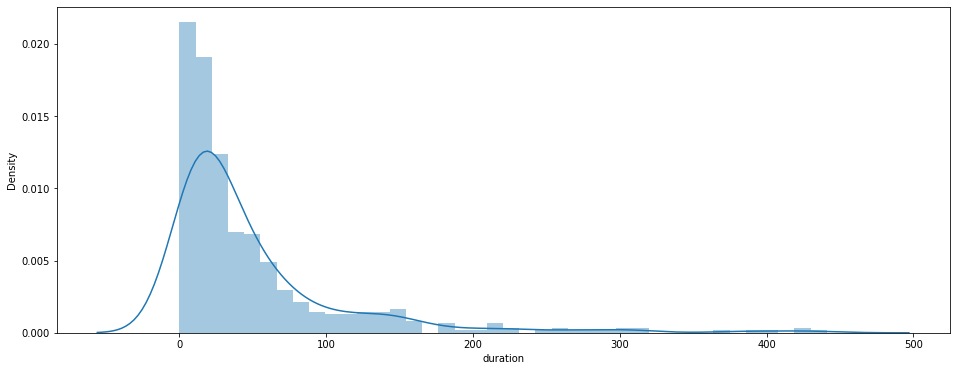

In [39]:
plt.figure(figsize=(16, 6))
duration = sns.distplot(df['duration'])

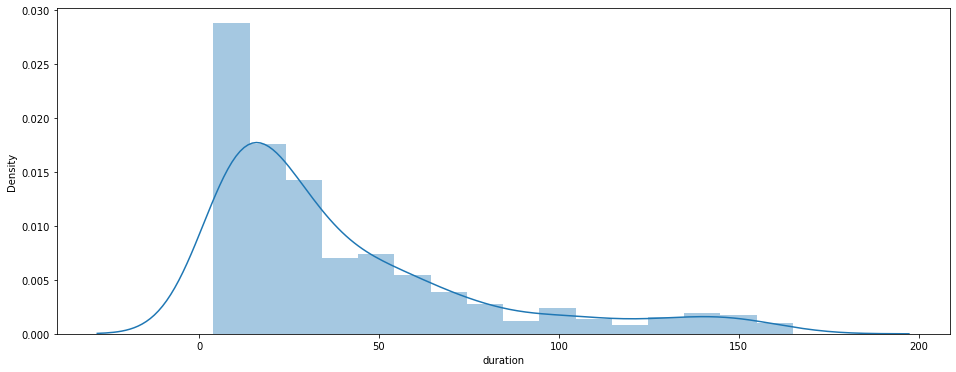

In [40]:
duration_adjusted = df['duration'][df['duration'].between(df['duration'].quantile(.05), df['duration'].quantile(.95))] 
plt.figure(figsize=(16, 6))
duration = sns.distplot(duration_adjusted)

In [41]:
fig = go.Figure(data=go.Pie(labels=df["speed"].value_counts().head(20).index, values=df["speed"].value_counts().head(20).values), layout_title_text="Speedwise Count")

In [42]:
fig

In [43]:
fig = go.Figure(data=[go.Bar(x=df["pitch"].value_counts().index, y=df["pitch"].value_counts().values)], layout_title_text="Pitchwise Count")
fig

In [44]:
fig = go.Figure(data=[go.Bar(x=df["number_of_notes"].value_counts().index, y=df["number_of_notes"].value_counts().values)], layout_title_text="Number of Notes Count")
fig

In [45]:
le = LabelEncoder()
fig = go.Figure(data=go.Scattergeo(lat=df['latitude'], 
                     lon=df['longitude'], hovertext=df['species'], marker_color=le.fit_transform(df['species'])))
fig.show()

In [46]:
dates = df['date'].value_counts().sort_index()
fig = go.Figure([go.Scatter(x=dates[4:].index, y=dates[4:].values)])
fig.update_layout(title='Quantity of birds recorded over time')
fig.show()

In [47]:
species = df['species'].value_counts()
fig = go.Figure(data=[
    go.Bar(y=species.values, x=species.index)
])

fig.update_layout(title='Distribution of Bird Species')
fig.show()

In [48]:
durations = df['duration'].value_counts()
fig = go.Figure(data=[
    go.Bar(y=durations.values, x=durations.index, marker_color='deeppink')
])

fig.update_layout(title='Distribution of durations in seconds')
fig.update_xaxes(range=[0, 500])
fig.show()

In [49]:
print('Dataset has %d rows and %d columns' % df.shape, end="")

Dataset has 557 rows and 35 columns

In [50]:
print('There are %d unique bird species in the dataset' % df['ebird_code'].nunique(), end="")

There are 7 unique bird species in the dataset

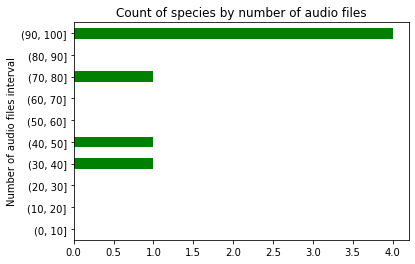

In [51]:
species_count = df.groupby(['species']).size().reset_index()
species_count['Number of audio files interval'] = pd.cut(species_count[0], np.arange(0,110,10))
species_count_bins = species_count.groupby(['Number of audio files interval']).size()
species_count_bins.plot(kind="barh", title="Count of species by number of audio files", color='green');

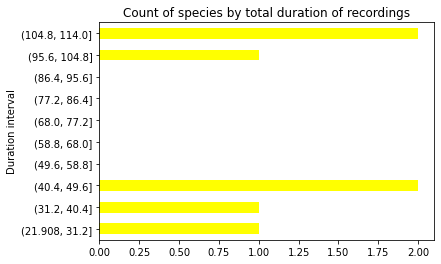

In [52]:
species_duration = df.groupby(['species']).sum()['duration'].reset_index()
species_duration['duration_mins'] = np.round(species_duration['duration']/60)
species_duration['Duration interval'] =  pd.cut(species_duration['duration_mins'], 10)
species_duration_bins = species_duration.groupby(['Duration interval']).size()
species_duration_bins.plot(kind="barh", title="Count of species by total duration of recordings", color='yellow');

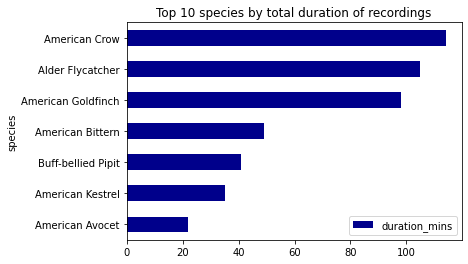

In [53]:
species_duration_top = (
    species_duration
      .sort_values('duration', ascending=False)
      .head(10)[['species', 'duration_mins']]
      .set_index('species')
)
ax = species_duration_top.plot(kind="barh", title="Top 10 species by total duration of recordings", color='darkblue');
ax.invert_yaxis()

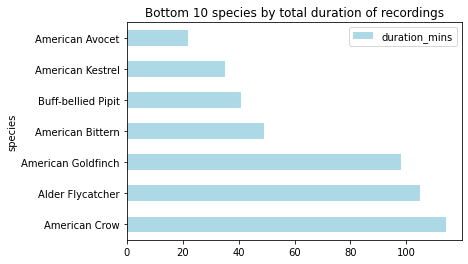

In [54]:
species_duration_bottom = (
    species_duration
      .sort_values('duration', ascending=True)
      .head(10)[['species', 'duration_mins']]
      .set_index('species')
)
ax = species_duration_bottom.plot(kind="barh", title="Bottom 10 species by total duration of recordings", color='lightblue');
ax.invert_yaxis()

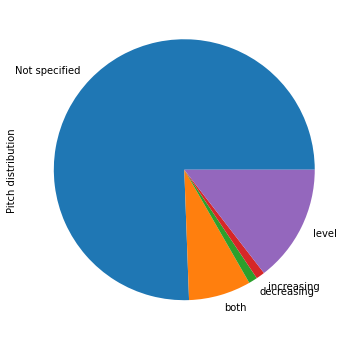

In [55]:
pitch_count =  df.groupby(['pitch']).size()
pitch_count.name = 'Pitch distribution'
pitch_count.plot.pie(y='Pitch distribution', figsize=(6, 6));

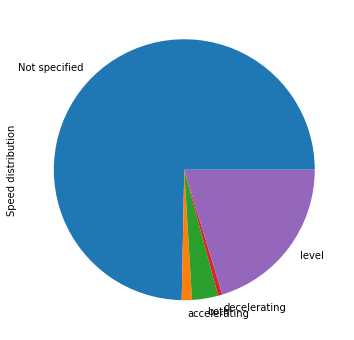

In [56]:
speed_count =  df.groupby(['speed']).size()
speed_count.name = 'Speed distribution'
speed_count.plot.pie(y='Speed distribution', figsize=(6, 6));

In [57]:
def extract_hour_of_day(time):
    time = time.lower()
    hour = time[:time.find(':')]
    if hour.isnumeric():
        hour = int(hour)
    else:
        hour = np.nan
        
    if ('pm' in time) & (hour !=12):
        hour = hour+12    
    if ('am' in time) & (hour ==12):
        hour = 0    
    return hour

In [58]:
df['hour_of_day'] = list(map(extract_hour_of_day, df['time']))

In [59]:
df['month_of_year'] = df['date'].str[5:7]

In [60]:
time_count = pd.pivot_table(df, values='rating', index=['hour_of_day'],
                    columns=['month_of_year'], aggfunc='count')
del time_count['00']

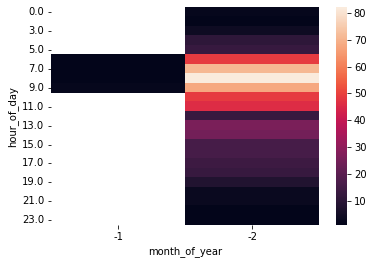

In [61]:
sns.heatmap(time_count);

In [62]:
def extract_elevation(elevation):
    elevation = elevation.replace('m', '')
    elevation = elevation.replace('~', '')
    elevation = elevation.replace(',', '').strip()
    if elevation.isnumeric():
        elevation = float(elevation)
    else:
        elevation = np.nan
    return elevation

In [63]:
df['elevation_clean'] = list(map(extract_elevation, df['elevation']))

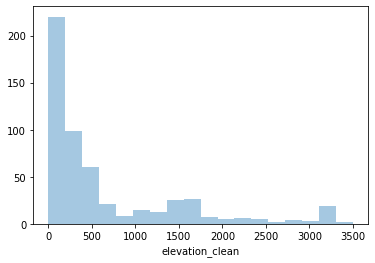

In [64]:
sns.distplot(df['elevation_clean'], kde=False);

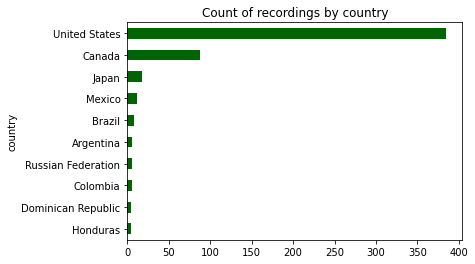

In [65]:
country_count = df.groupby(['country']).size().sort_values(ascending=False).head(10)
country_count.name = 'count'
ax = country_count.plot(kind="barh", title="Count of recordings by country", color='darkgreen');
ax.invert_yaxis()

In [66]:
ex_file = ('Dataset/train_audio'+ '/' + 
           df['ebird_code']+ '/' + 
           df['filename']).iloc[12] 
print(ex_file)

Dataset/train_audio/aldfly/XC142065.mp3


In [67]:

x, sr = librosa.load(ex_file)

In [68]:
print(ex_file)

Dataset/train_audio/aldfly/XC142065.mp3


In [69]:
display.Audio(data=x, rate=sr)

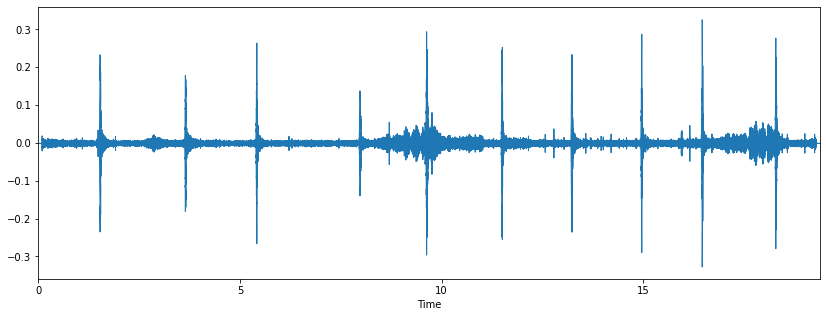

In [70]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr);

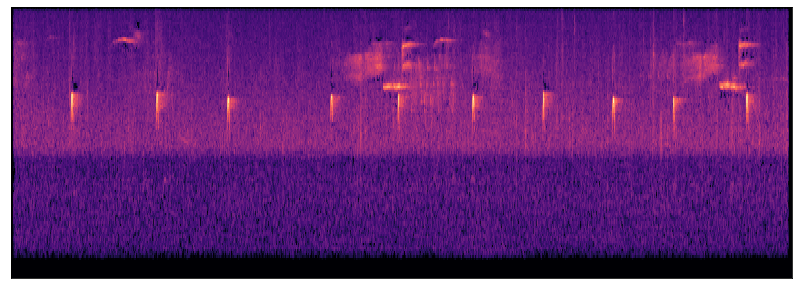

In [71]:
plt.figure(figsize=(14, 5))
s = librosa.feature.melspectrogram(x, sr=sr, n_fft=1028, hop_length=512, n_mels=128)
s_db = librosa.power_to_db(s, ref=np.max)
librosa.display.specshow(s_db, sr=sr);

In [72]:
norm_s = (s-s.min())/(s.max()-s.min())

In [73]:
from scipy.ndimage.morphology import binary_erosion,binary_dilation

In [74]:
column_medians = np.median(norm_s, axis=0)
row_medians = np.median(norm_s, axis=1)

In [75]:
filtered_spectrogram = np.greater(norm_s, column_medians*3)&np.greater(norm_s.T, row_medians*3).T*1

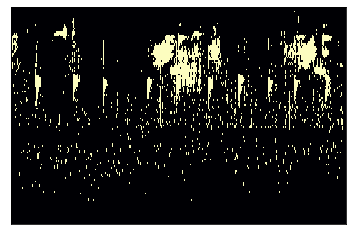

In [76]:
librosa.display.specshow(filtered_spectrogram);

In [77]:
eroded_spectrogram = binary_erosion(filtered_spectrogram)

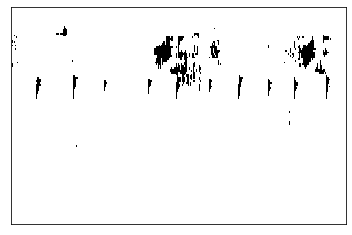

In [78]:
librosa.display.specshow(eroded_spectrogram);

In [79]:
dilated_idx = binary_dilation(eroded_spectrogram.sum(axis=0)>0,  iterations=3)

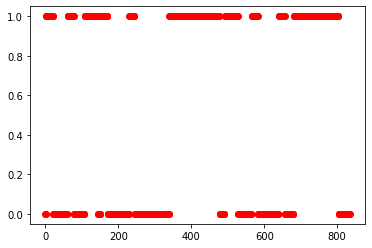

In [80]:
plt.plot(dilated_idx,'ro')

In [81]:
dilated_idx.mean()

0.525748502994012

In [82]:
x.shape[0]

427392

In [83]:
(np.round(np.interp(np.arange(x.shape[0]), np.arange(dilated_idx.shape[0])*x.shape[0]/dilated_idx.shape[0], dilated_idx)))

array([0., 0., 0., ..., 0., 0., 0.])

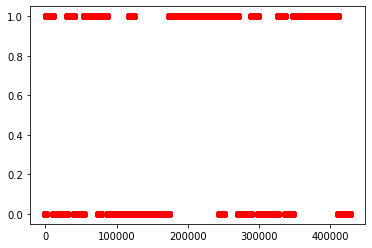

In [84]:
plt.plot(np.round(np.interp(np.arange(x.shape[0]), np.arange(dilated_idx.shape[0])*x.shape[0]/dilated_idx.shape[0], dilated_idx)),'ro')

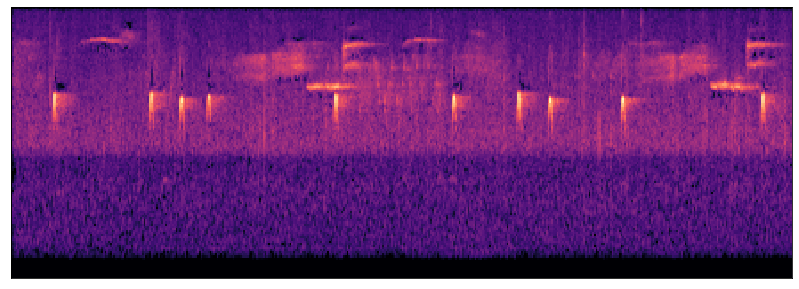

In [85]:
plt.figure(figsize=(14, 5))
s = librosa.feature.melspectrogram(x, sr=sr, n_fft=1028, hop_length=512, n_mels=128)
s_db = librosa.power_to_db(s[:,dilated_idx], ref=np.max)
librosa.display.specshow(s_db, sr=sr);

In [86]:
np.random.seed(0)
sample_classes = 3
sample_species = list(np.random.choice(df['ebird_code'].unique(), sample_classes, replace=False))

In [87]:
df_samp = df[(df['ebird_code'].isin(sample_species))]

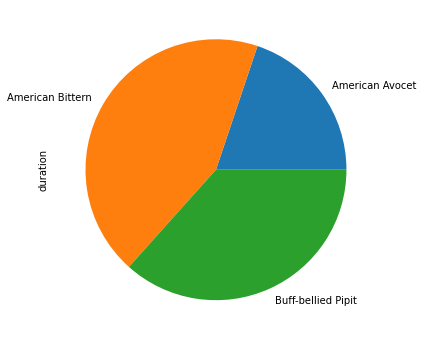

In [88]:
species_duration_samp =  df_samp.groupby(['species']).sum()['duration']
species_duration_samp.plot.pie(y='Duration distribution', figsize=(6, 6));

In [89]:
df_samp['path'] = 'Dataset/train_audio'+ '/' +  \
                            df_samp['ebird_code'] + '/' + \
                            df_samp['filename']

In [90]:
df_samp['chunks'] = np.floor(df_samp['duration']/3).astype(int)

In [1]:
df_samp = df_samp[df_samp['chunks']>0]
df_samp = df_samp[df_samp['duration']<120]

NameError: name 'df_samp' is not defined

In [2]:

le = preprocessing.LabelEncoder()
df_samp['class_code'] = le.fit_transform(df_samp['ebird_code'])

NameError: name 'preprocessing' is not defined

In [3]:
birdcall_train, birdcall_test = train_test_split(df_samp, test_size=0.2, random_state=0, stratify=df_samp[['ebird_code']])

NameError: name 'train_test_split' is not defined

In [4]:
birdcall_train[['path','chunks','duration','class_code']]

NameError: name 'birdcall_train' is not defined

In [95]:
sample_size = birdcall_train.shape[0]

In [96]:
sample_size

124

In [97]:
sec_split = 3

In [98]:
classes_size = birdcall_train['ebird_code'].nunique()

In [99]:
classes_size

3

In [100]:
obs_train = birdcall_train['chunks'].sum()

In [101]:
obs_train

826

In [102]:
X_train = np.zeros((obs_train, 128, 130))
Y_train = np.zeros((obs_train, classes_size))

In [103]:

scaler = StandardScaler()

In [104]:
i=0
for r in birdcall_train[['path','class_code']].iterrows():
    x, sr = librosa.load(r[1]['path'])
    S = librosa.feature.melspectrogram(x, sr=sr, n_fft=1028, hop_length=512, n_mels=128)
    norm_S = (S-S.min())/(S.max()-S.min())
    column_medians = np.median(norm_S, axis=0)
    row_medians = np.median(norm_S, axis=1)
    eroded_spectrogram = binary_erosion(np.greater(norm_S, column_medians*3)&np.greater(norm_S.T, row_medians*3).T*1)
    dilated_idx = binary_dilation(eroded_spectrogram.sum(axis=0)>0,  iterations=3)
    x =x[np.round(np.interp(np.arange(x.shape[0]),
                            np.arange(dilated_idx.shape[0])*x.shape[0]/dilated_idx.shape[0],
                            dilated_idx)).astype(bool)]
    x=x[:int(np.floor(x.shape[0]/sr/sec_split)*sec_split*sr)]
    if x.shape[0]>0:
        for n in np.array_split(x, np.floor(x.shape[0]/sr/sec_split)):        
            print('Loading train data [%.2f%%]\r'% np.round(i/obs_train*100, 2), end="")
            S = librosa.feature.melspectrogram(n, sr=sr, n_fft=1028, hop_length=512, n_mels=128)
            S_DB_sc = scaler.fit_transform(librosa.power_to_db(S))
    #         S_DB_mm = minmaxscaler.fit_transform(S_DB_sc)
            X_train[i, :, :] = S_DB_sc
            Y_train[i, r[1]['class_code']] = 1
            i += 1

In [105]:
i

410

In [106]:
X_train = X_train[:i, :, :]
Y_train = Y_train[:i, :]

In [107]:
obs_test = birdcall_test['chunks'].sum()

In [108]:
obs_test

250

In [109]:
X_test = np.zeros((obs_test, 128, 130))
Y_test = np.zeros((obs_test, classes_size))

In [110]:
j=0
for r in birdcall_test[['path','class_code']].iterrows():
    x, sr = librosa.load(r[1]['path'])
    S = librosa.feature.melspectrogram(x, sr=sr, n_fft=1028, hop_length=512, n_mels=128)
    norm_S = (S-S.min())/(S.max()-S.min())
    column_medians = np.median(norm_S, axis=0)
    row_medians = np.median(norm_S, axis=1)
    eroded_spectrogram = binary_erosion(np.greater(norm_S, column_medians*3)&np.greater(norm_S.T, row_medians*3).T*1)
    dilated_idx = binary_dilation(eroded_spectrogram.sum(axis=0)>0,  iterations=3)
    x =x[np.round(np.interp(np.arange(x.shape[0]),
                            np.arange(dilated_idx.shape[0])*x.shape[0]/dilated_idx.shape[0],
                            dilated_idx)).astype(bool)]
    x=x[:int(np.floor(x.shape[0]/sr/sec_split)*sec_split*sr)]
    if x.shape[0]>0:
        for n in np.array_split(x, np.floor(x.shape[0]/sr/sec_split)):        
            print('Loading test data [%.2f%%]\r'% np.round(j/obs_test*100, 2), end="")
            S = librosa.feature.melspectrogram(n, sr=sr, n_fft=1028, hop_length=512, n_mels=128)
            S_DB_sc = scaler.fit_transform(librosa.power_to_db(S))
    #         S_DB_mm = minmaxscaler.fit_transform(S_DB_sc)
            X_test[j, :, :] = S_DB_sc
            Y_test[j, r[1]['class_code']] = 1
            j += 1

In [111]:
j

102

In [112]:
X_test = X_test[:j, :, :]
Y_test = Y_test[:j, :]

In [113]:
X_train = X_train.reshape(X_train.shape[0], 128, 130, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 130, 1)

In [149]:
K.clear_session()
model = Sequential()
model.add(Conv2D(16, (4,4), strides=(1, 1), input_shape = (128, 130, 1), padding='same', activation = 'relu'))

model.add(MaxPool2D((4,4)))
model.add(Flatten())

model.add(Dense(32))

model.add(Dense(classes_size, activation = 'softmax'))
model = ResNet50()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 130, 16)      272       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                524320    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 524,691
Trainable params: 524,691
Non-trainable params: 0
_________________________________________________________________


In [150]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.arange(classes_size),
                                     y=np.argmax(Y_train, axis=1))

In [151]:
class_weights_dict = {}
for c in np.arange(classes_size):
    class_weights_dict[c] = class_weights[c]

In [152]:
model.compile('Adam', loss = 'categorical_crossentropy',
              metrics = ['categorical_crossentropy'])
model.fit(x = X_train, y = Y_train, 
          batch_size = 64, 
          epochs = 20, 
          validation_split=0.2,
          class_weight=class_weights_dict)

Train on 328 samples, validate on 82 samples
Epoch 1/20
328/328 [==============================] - ETA: 0s - loss: 1.0801 - categorical_crossentropy: 1.07 - ETA: 0s - loss: 1.6755 - categorical_crossentropy: 1.98 - ETA: 0s - loss: 2.7598 - categorical_crossentropy: 2.70 - ETA: 0s - loss: 3.5313 - categorical_crossentropy: 3.05 - ETA: 0s - loss: 3.0641 - categorical_crossentropy: 2.68 - 1s 3ms/sample - loss: 3.0807 - categorical_crossentropy: 2.7163 - val_loss: 1.9324 - val_categorical_crossentropy: 2.2082
Epoch 2/20
328/328 [==============================] - ETA: 0s - loss: 1.6598 - categorical_crossentropy: 2.13 - ETA: 0s - loss: 2.0711 - categorical_crossentropy: 2.70 - ETA: 0s - loss: 1.7862 - categorical_crossentropy: 2.34 - ETA: 0s - loss: 1.6623 - categorical_crossentropy: 2.18 - ETA: 0s - loss: 1.4712 - categorical_crossentropy: 1.90 - 1s 3ms/sample - loss: 1.4364 - categorical_crossentropy: 1.8622 - val_loss: 1.1615 - val_categorical_crossentropy: 0.6915
Epoch 3/20
328/328 [===

In [153]:
Y_pred_test = model.predict_classes(X_test)

In [154]:
print(metrics.confusion_matrix(np.argmax(Y_test, axis=1), Y_pred_test))

[[10  0  0]
 [31 10  2]
 [ 0  0 49]]


In [155]:
print(metrics.classification_report(np.argmax(Y_test, axis=1), Y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.244     1.000     0.392        10
           1      1.000     0.233     0.377        43
           2      0.961     1.000     0.980        49

    accuracy                          0.676       102
   macro avg      0.735     0.744     0.583       102
weighted avg      0.907     0.676     0.668       102

